# MLUL2 Assignment
# Book Recommendation System
## GRP:15
## THE OVERFITTERS

In [6]:
pip install kaggle

Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import ttk, messagebox
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, LabelEncoder
from kaggle.api.kaggle_api_extended import KaggleApi

# Downloading the data from github

Note: Make sure that kaggle credentionals are downloaded and placed in your main directory. If it doesnt work, dataset can be downloaded manually from: https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews

In [9]:
# Initialize and authenticate the API
api = KaggleApi()
api.authenticate()

# Download a dataset
dataset_name = "mohamedbakhet/amazon-books-reviews"
output_dir = "." 
api.dataset_download_files(dataset_name, path=output_dir, unzip=True)

Dataset URL: https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews


In [10]:
books_data = pd.read_csv("books_data.csv")
books_rating = pd.read_csv("Books_rating.csv")

# 1. Exploratory Data Analysis (EDA) for books_data Dataset

In [12]:
books_data.shape

(212404, 10)

In [13]:
books_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212404 entries, 0 to 212403
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Title          212403 non-null  object 
 1   description    143962 non-null  object 
 2   authors        180991 non-null  object 
 3   image          160329 non-null  object 
 4   previewLink    188568 non-null  object 
 5   publisher      136518 non-null  object 
 6   publishedDate  187099 non-null  object 
 7   infoLink       188568 non-null  object 
 8   categories     171205 non-null  object 
 9   ratingsCount   49752 non-null   float64
dtypes: float64(1), object(9)
memory usage: 16.2+ MB


In [14]:
books_data.isnull().sum()

Title                 1
description       68442
authors           31413
image             52075
previewLink       23836
publisher         75886
publishedDate     25305
infoLink          23836
categories        41199
ratingsCount     162652
dtype: int64

In [15]:
books_data.head()

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN


## 1.1 Dataset Overview
This dataset contains information about book titles, author, publisher, published date, categories, image and ratings count.

## 1.2 Column Types

### Categorical Columns
- authors
- categories
- publisher

### Numerical Columns
- ratingsCount
- publishedDate

## Univariate Analysis for Categorical Columns

### Value Counts & Visualizing with Bar Plots:

- Top Authors:

Top authors:
 authors
Unknown                                  31413
Rose Arny                                  236
William Shakespeare                        217
Library of Congress. Copyright Office      178
Agatha Christie                            144
Erle Stanley Gardner                       126
Louis L'Amour                              123
Charles Dickens                             95
Isaac Asimov                                86
Edgar Rice Burroughs                        86
Name: count, dtype: int64


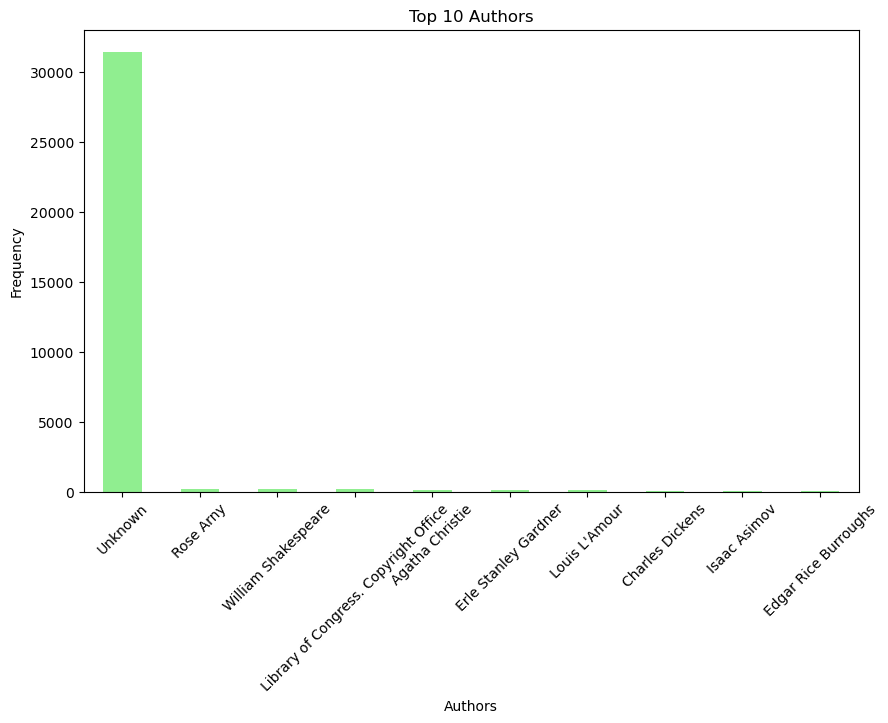

In [20]:
books_data["authors"] = books_data["authors"].apply(
    lambda x: eval(x)[0] if pd.notnull(x) else "Unknown"
)

top_authors = books_data["authors"].value_counts().head(10)
print("Top authors:\n", top_authors)

# Plotting top authors
plt.figure(figsize=(10, 6))
top_authors.plot(kind="bar", color="lightgreen")
plt.title("Top 10 Authors")
plt.xlabel("Authors")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


- Top Categories:

categories
['Fiction']                      23419
['Religion']                      9459
['History']                       9330
['Juvenile Fiction']              6643
['Biography & Autobiography']     6324
['Business & Economics']          5625
['Computers']                     4312
['Social Science']                3834
['Juvenile Nonfiction']           3446
['Science']                       2623
Name: count, dtype: int64


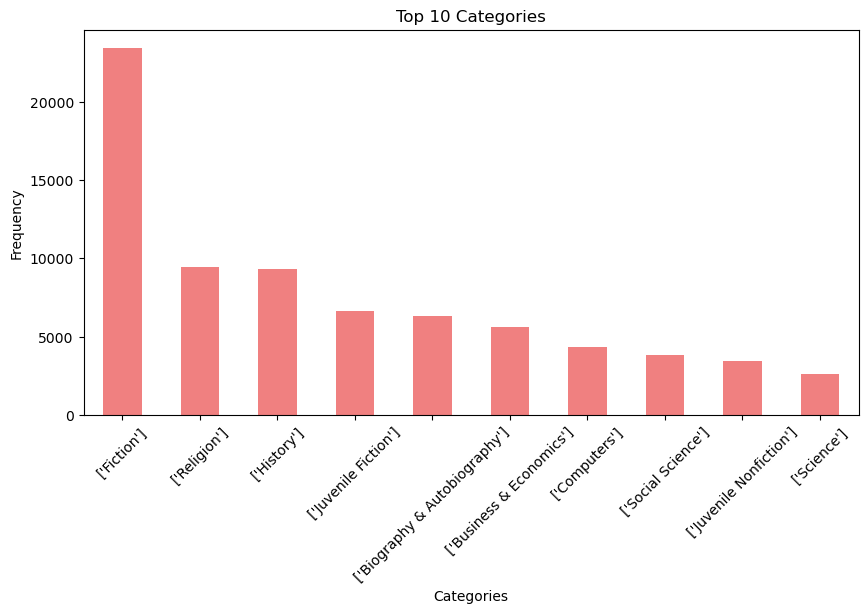

In [22]:
category_counts = books_data["categories"].explode().value_counts()

print(category_counts.head(10))  # Top 10 categories
category_counts.head(10).plot(kind="bar", figsize=(10, 5), color="lightcoral")
plt.title("Top 10 Categories")
plt.ylabel("Frequency")
plt.xlabel("Categories")
plt.xticks(rotation=45)
plt.show()

### Unique and Missing Values:

In [24]:
for col in ["authors", "publisher", "categories"]:
    print(
        f"{col} - Unique: {books_data[col].nunique()}, Missing: {books_data[col].isnull().sum()}"
    )

authors - Unique: 118909, Missing: 0
publisher - Unique: 16016, Missing: 75886
categories - Unique: 10883, Missing: 41199


### Distribution of Unique Values (Using Count Plot):

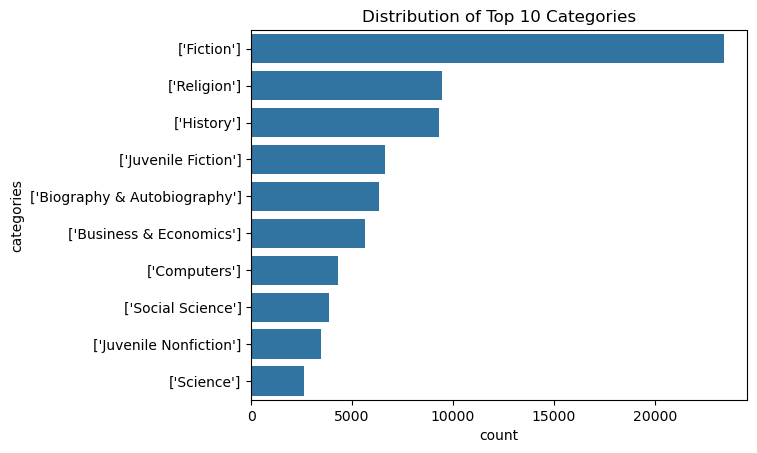

In [26]:
sns.countplot(
    y=books_data["categories"].explode(), order=category_counts.head(10).index
)
plt.title("Distribution of Top 10 Categories")
plt.show()

## Univariate Analysis for Numerical Columns

### Analyzing ratingsCount and publishedDate columns

- Ratings Count:

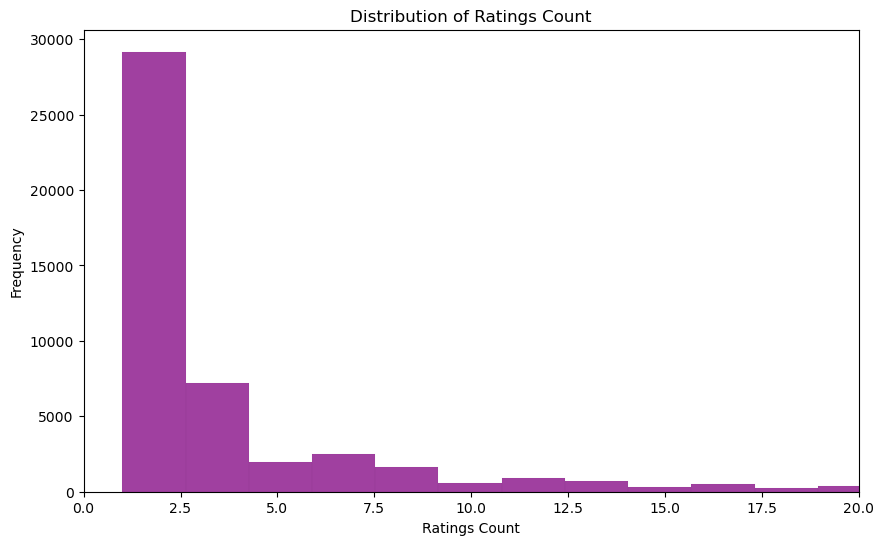

In [30]:
# Plotting ratings distribution
plt.figure(figsize=(10, 6))
sns.histplot(books_data["ratingsCount"], bins=3000, kde=False, color="purple")
plt.title("Distribution of Ratings Count")
plt.xlabel("Ratings Count")
plt.ylabel("Frequency")

plt.xlim(0, 20)
plt.show()

#### As observed from the graph that most of the values are tending to zero + NaN point to be considered......

- Published Year: Extracting years from publishedDate for analysis:

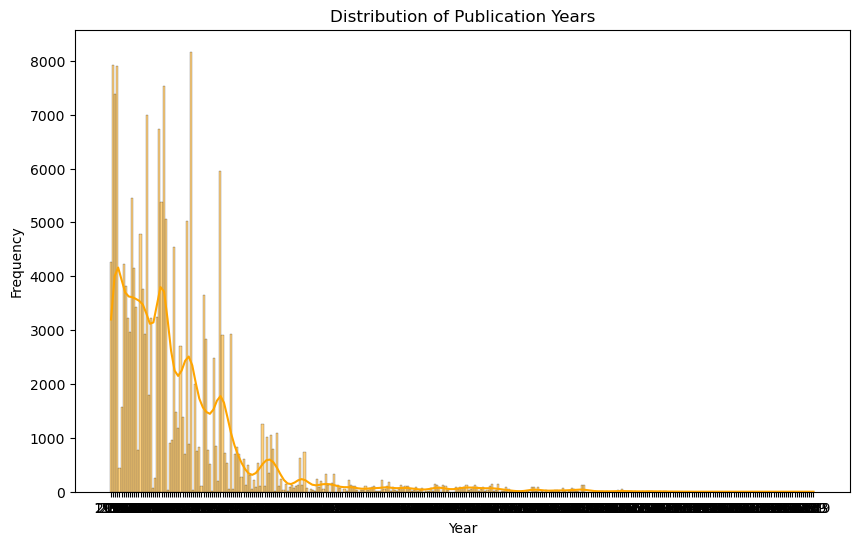

In [33]:
# Extracting years from publishedDate
books_data["publishedYear"] = books_data["publishedDate"].str.extract(r"^(\d{4})")

# Analyzing distribution of publication years
plt.figure(figsize=(10, 6))
sns.histplot(books_data["publishedYear"].dropna(), bins=20, kde=True, color="orange")
plt.title("Distribution of Publication Years")
plt.xlabel("Year")
plt.ylabel("Frequency")

plt.show()

### Outlier Detection:

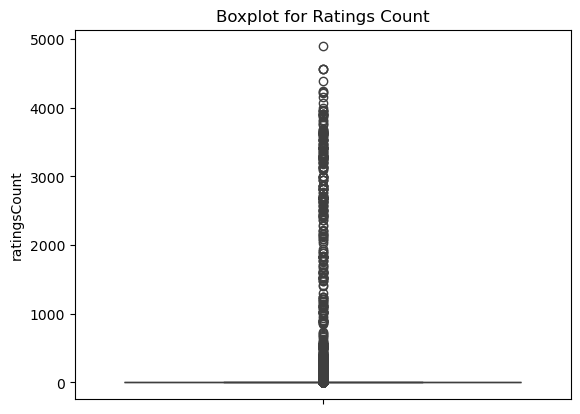

In [35]:
sns.boxplot(books_data["ratingsCount"].dropna())
plt.title("Boxplot for Ratings Count")
plt.show()

## Summary Statistics

In [37]:
# Numerical summary
print(books_data.describe())

# Categorical summary
print(books_data["categories"].value_counts().head(10))

       ratingsCount
count  49752.000000
mean      21.252975
std      201.340431
min        1.000000
25%        1.000000
50%        2.000000
75%        5.000000
max     4895.000000
categories
['Fiction']                      23419
['Religion']                      9459
['History']                       9330
['Juvenile Fiction']              6643
['Biography & Autobiography']     6324
['Business & Economics']          5625
['Computers']                     4312
['Social Science']                3834
['Juvenile Nonfiction']           3446
['Science']                       2623
Name: count, dtype: int64


## Bivariate Analysis For Categorical vs Numerical Columns

### Authors vs Ratings Count (Average ratings count for top authors):

authors
Laura Hillenbrand        4572.0
Rebecca Skloot           4067.0
Ransom Riggs             3896.0
Christopher McDougall    3876.0
Charles Duhigg           3863.0
Gretchen Rubin           3777.0
Randall Munroe           3768.0
Sheryl Sandberg          3756.0
Emma McLaughlin          3675.0
Robert M. Pirsig         3618.0
Name: ratingsCount, dtype: float64


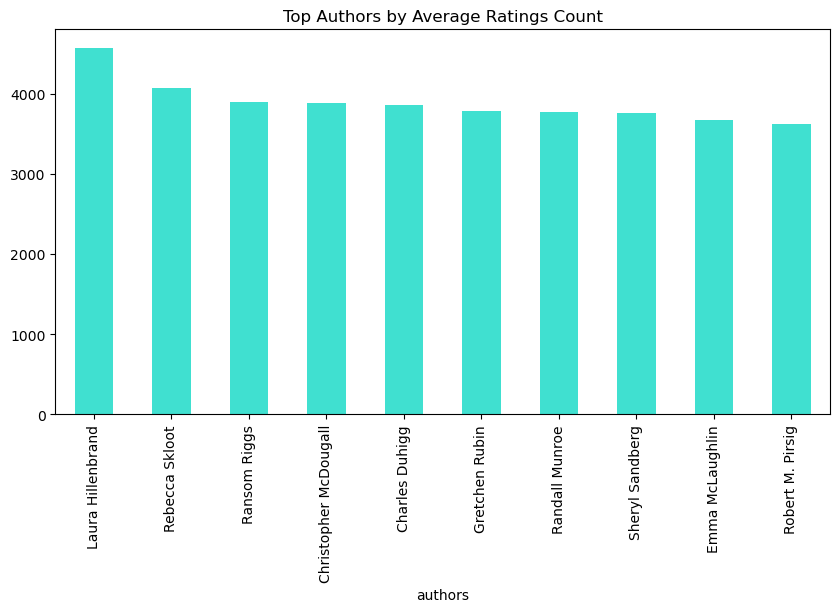

In [40]:
author_ratings = (
    books_data.explode("authors")
    .groupby("authors")["ratingsCount"]
    .mean()
    .sort_values(ascending=False)
)
print(author_ratings.head(10))
author_ratings.head(10).plot(kind="bar", figsize=(10, 5), color="turquoise")
plt.title("Top Authors by Average Ratings Count")
plt.show()

### Categories vs Ratings Count:

categories
['Abnormalities, Human']                     3416.000000
['Charity-schools']                          2634.000000
['Country homes']                            1655.000000
['Horror comic books, strips, etc']          1306.000000
['Botswana']                                 1183.333333
['Frankenstein (Fictitious character)']      1083.000000
['Justice']                                   894.000000
['Baggins, Bilbo (Fictitious character)']     704.000000
['Horror tales, American']                    532.666667
['Readers']                                   379.250000
Name: ratingsCount, dtype: float64


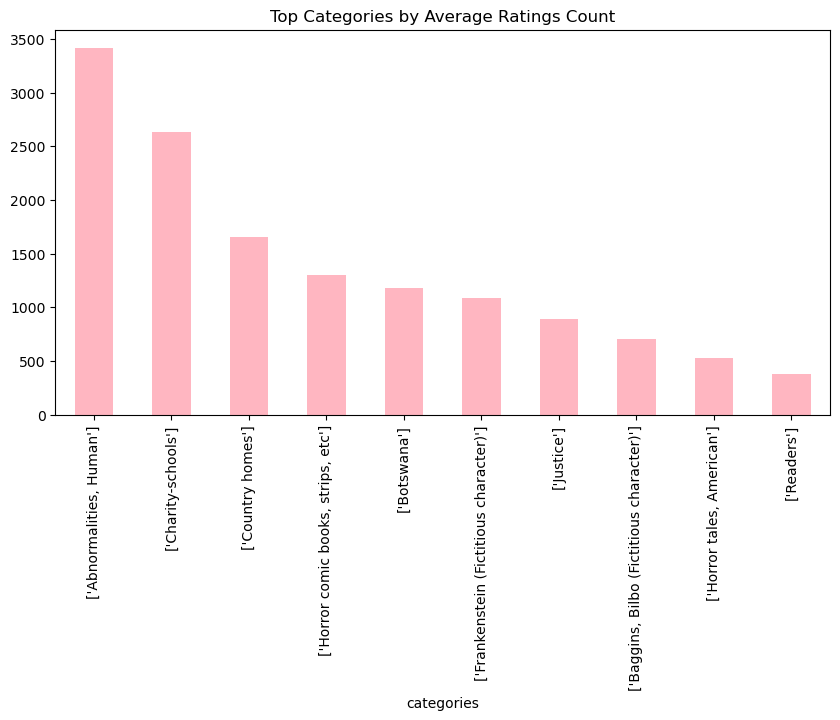

In [42]:
category_ratings = (
    books_data.explode("categories")
    .groupby("categories")["ratingsCount"]
    .mean()
    .sort_values(ascending=False)
)
print(category_ratings.head(10))
category_ratings.head(10).plot(kind="bar", figsize=(10, 5), color="lightpink")
plt.title("Top Categories by Average Ratings Count")
plt.show()

## Bivariate Analysis For Numerical vs Numerical Columns

### Correlation Matrix:

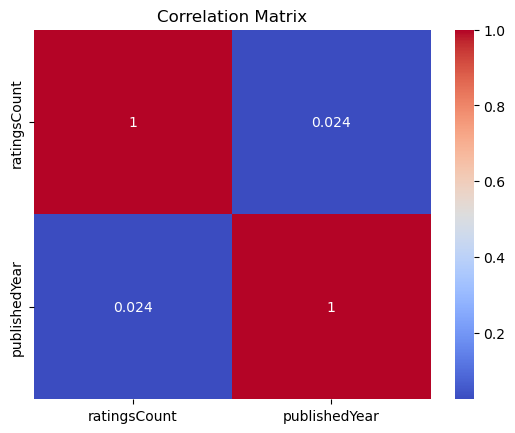

In [45]:
corr_matrix = books_data[["ratingsCount", "publishedYear"]].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

### Scatter Plot:

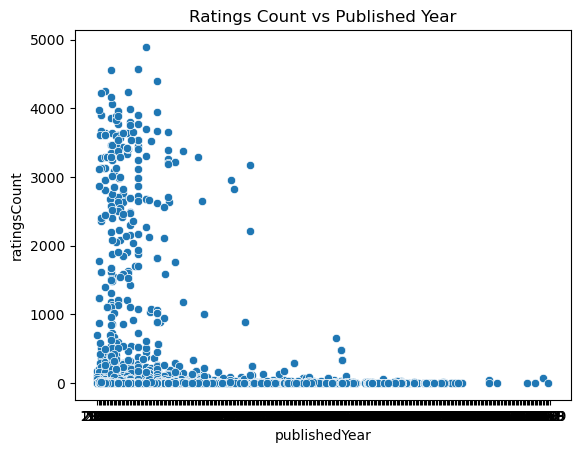

In [47]:
sns.scatterplot(x="publishedYear", y="ratingsCount", data=books_data)
plt.title("Ratings Count vs Published Year")
plt.show()

# 2. Exploratory Data Analysis (EDA) for books_rating Dataset

In [49]:
books_rating.shape

(3000000, 10)

In [50]:
books_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   Title               object 
 2   Price               float64
 3   User_id             object 
 4   profileName         object 
 5   review/helpfulness  object 
 6   review/score        float64
 7   review/time         int64  
 8   review/summary      object 
 9   review/text         object 
dtypes: float64(2), int64(1), object(7)
memory usage: 228.9+ MB


In [51]:
books_rating.isnull().sum()

Id                          0
Title                     208
Price                 2518829
User_id                561787
profileName            561905
review/helpfulness          0
review/score                0
review/time                 0
review/summary            407
review/text                 8
dtype: int64

In [52]:
books_rating.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


## 2.1 Dataset Overview
This dataset contains information about book reviews, including titles, user details, review/scores, and prices.

## 2.2 Column Types

### Categorical Columns
- Titles
- User_id
- profileName
- review/helpfulness

### Numerical Columns
- Price
- review/score
- review/time

## Univariate Analysis for Categorical Columns
- Value Count (To identify which titles and users dominate the dataset)

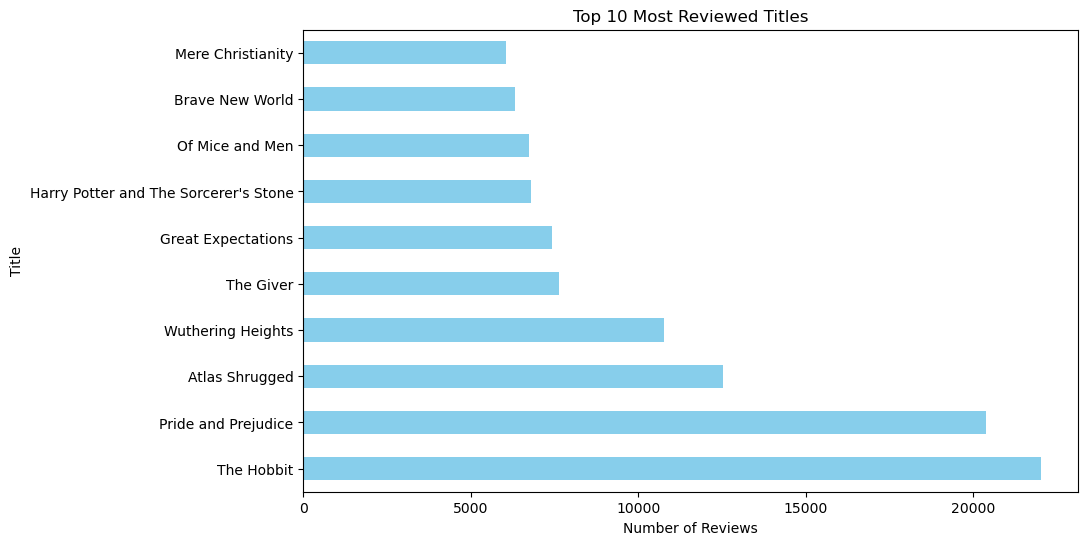

In [55]:
# Top 10 most reviewed titles
books_rating["Title"].value_counts().sort_values(ascending=False).head(10).plot(
    kind="barh", figsize=(10, 6), color="skyblue"
)
plt.title("Top 10 Most Reviewed Titles")
plt.xlabel("Number of Reviews")
plt.ylabel("Title")
plt.show()

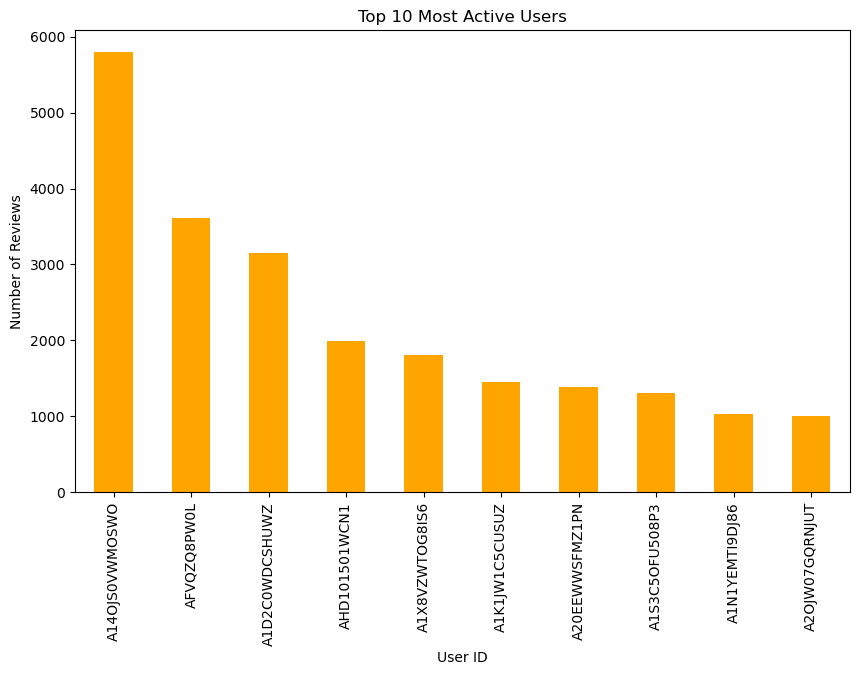

In [56]:
# Top 10 most active users
books_rating["User_id"].value_counts().sort_values(ascending=False).head(10).plot(
    kind="bar", figsize=(10, 6), color="orange"
)
plt.title("Top 10 Most Active Users")
plt.xlabel("User ID")
plt.ylabel("Number of Reviews")
plt.show()

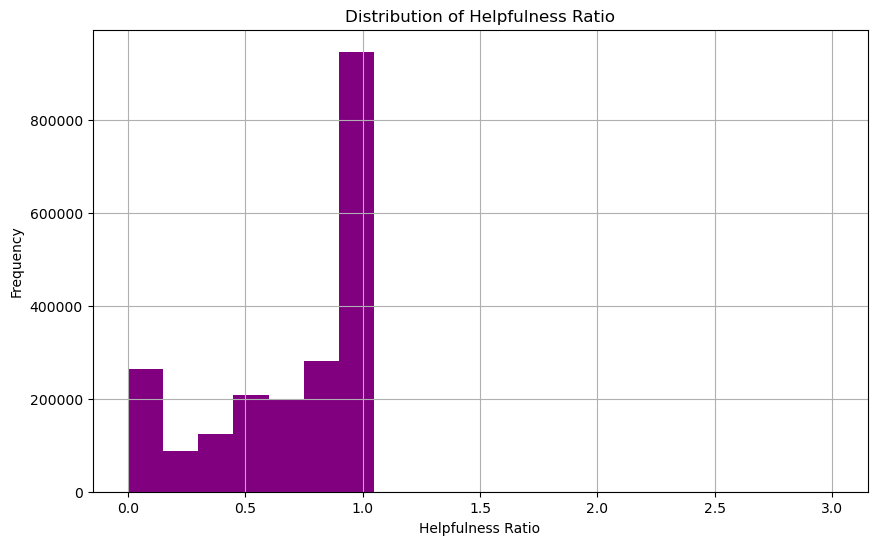

In [57]:
# Distribution of review/helpfulness (To observe patterns in the helpfulness ratio.r)
books_rating["helpful_numerator"] = (
    books_rating["review/helpfulness"].str.split("/").str[0].astype(float)
)
books_rating["helpful_denominator"] = (
    books_rating["review/helpfulness"].str.split("/").str[1].astype(float)
)

books_rating["helpful_ratio"] = (
    books_rating["helpful_numerator"] / books_rating["helpful_denominator"]
)

books_rating["helpful_ratio"].hist(bins=20, figsize=(10, 6), color="purple")
plt.title("Distribution of Helpfulness Ratio")
plt.xlabel("Helpfulness Ratio")
plt.ylabel("Frequency")
plt.show()

## Univariate Analysis for Numerical Columns
- Distribution Plots:

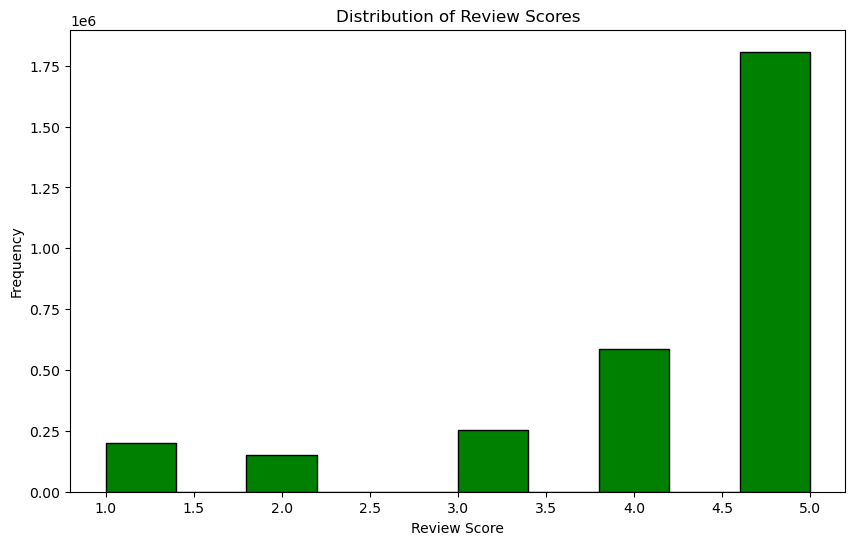

In [59]:
# Review scores
books_rating["review/score"].plot(
    kind="hist", bins=10, figsize=(10, 6), color="green", edgecolor="black"
)
plt.title("Distribution of Review Scores")
plt.xlabel("Review Score")
plt.ylabel("Frequency")
plt.show()

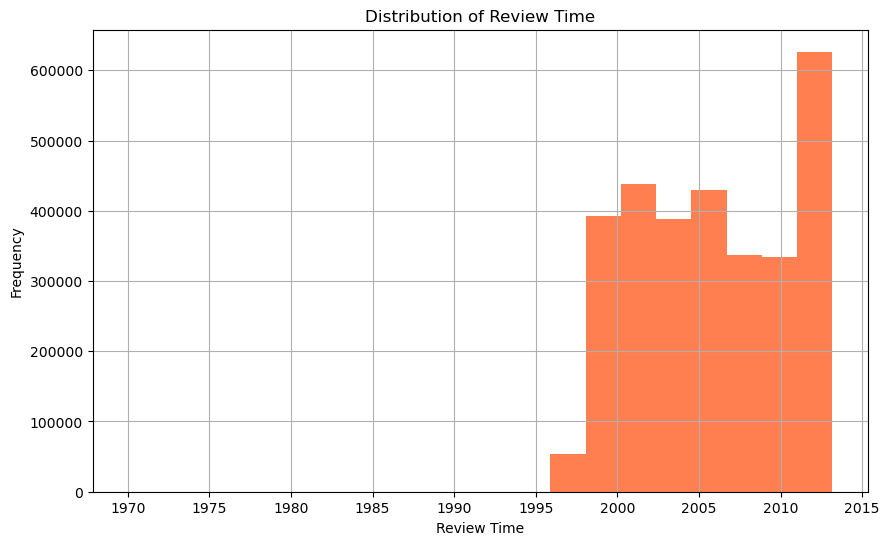

In [60]:
# Review time distribution (convert to datetime)
books_rating["review/time"] = pd.to_datetime(books_rating["review/time"], unit="s")
books_rating["review/time"].hist(bins=20, figsize=(10, 6), color="coral")
plt.title("Distribution of Review Time")
plt.xlabel("Review Time")
plt.ylabel("Frequency")
plt.show()

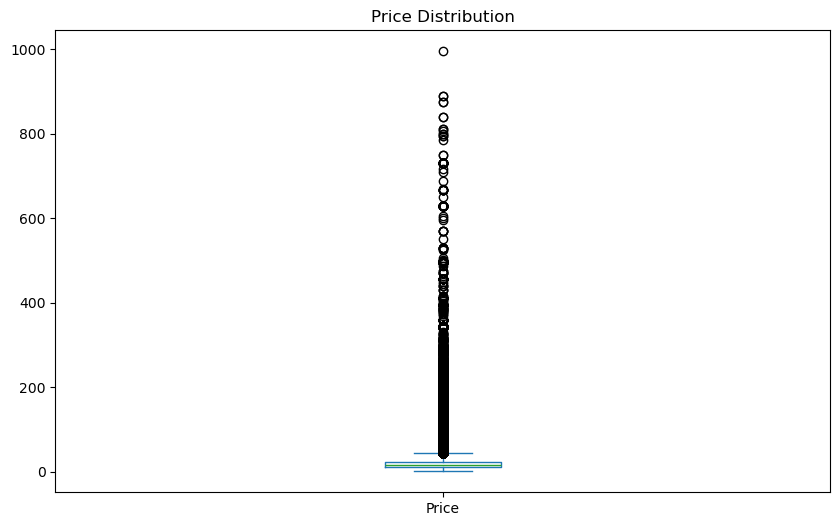

In [61]:
# Price distribution (handle missing values)
books_rating["Price"] = pd.to_numeric(books_rating["Price"], errors="coerce")
books_rating["Price"].dropna().plot(kind="box", figsize=(10, 6))
plt.title("Price Distribution")
plt.show()

## Bivariate Analysis For Categorical vs Numerical Columns

### Average Review Score by Title:

Value counts of average review scores:
 review/score
5.0    10
Name: count, dtype: int64


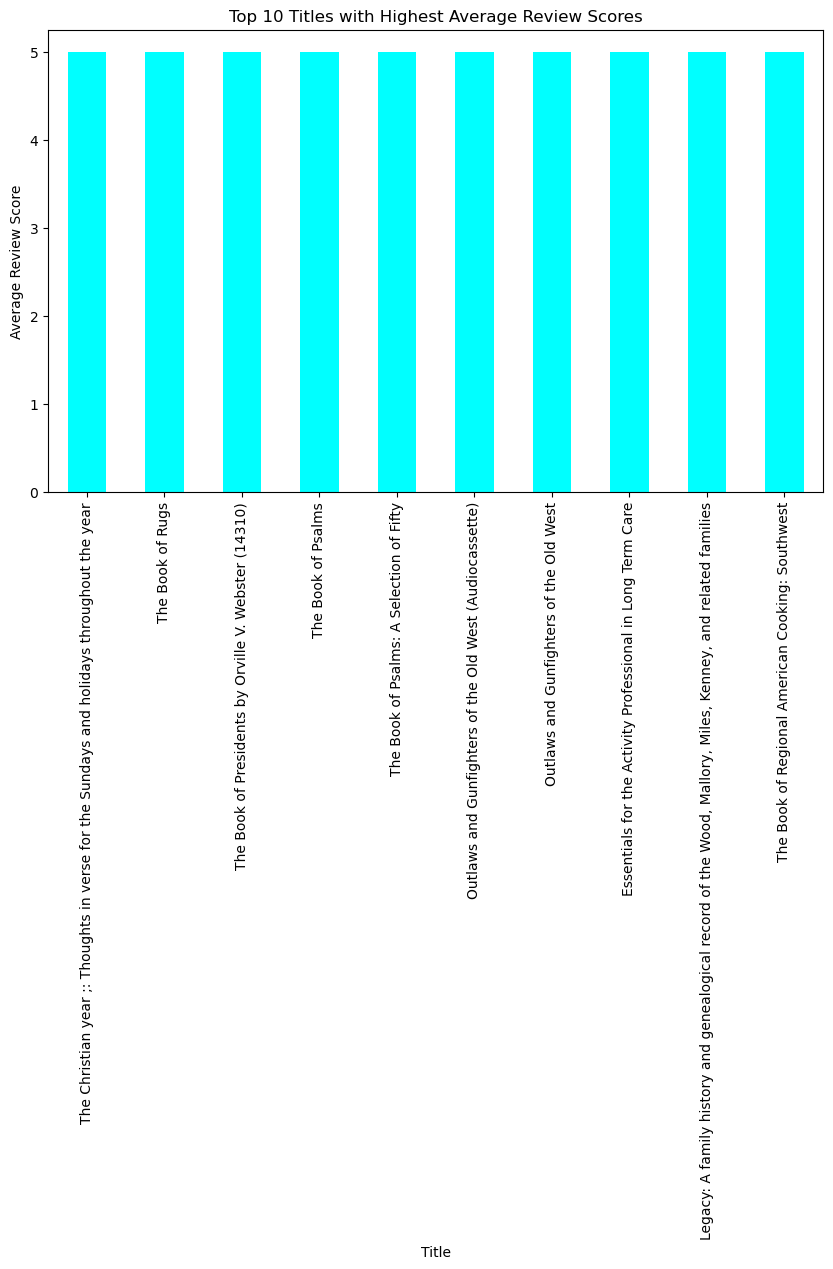

In [64]:
avg_score_per_title = (
    books_rating.groupby("Title")["review/score"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)
print("Value counts of average review scores:\n", avg_score_per_title.value_counts())
avg_score_per_title.plot(kind="bar", figsize=(10, 6), color="cyan")
plt.title("Top 10 Titles with Highest Average Review Scores")
plt.xlabel("Title")
plt.ylabel("Average Review Score")
plt.show()

## Bivariate Analysis For Numerical vs Numerical Columns

### Price vs Review Score:

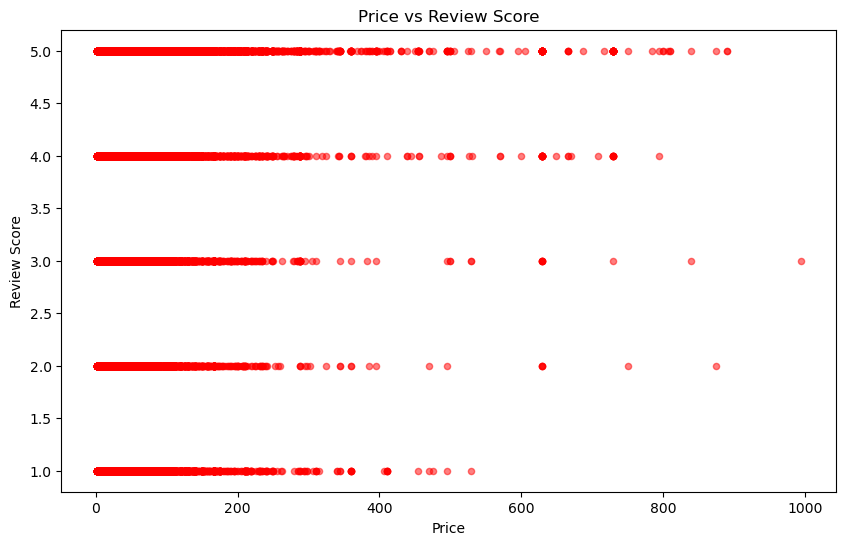

In [67]:
books_rating.plot.scatter(
    x="Price", y="review/score", alpha=0.5, figsize=(10, 6), color="red"
)
plt.title("Price vs Review Score")
plt.xlabel("Price")
plt.ylabel("Review Score")
plt.show()

### Helpfulness Ratio vs Review Score:

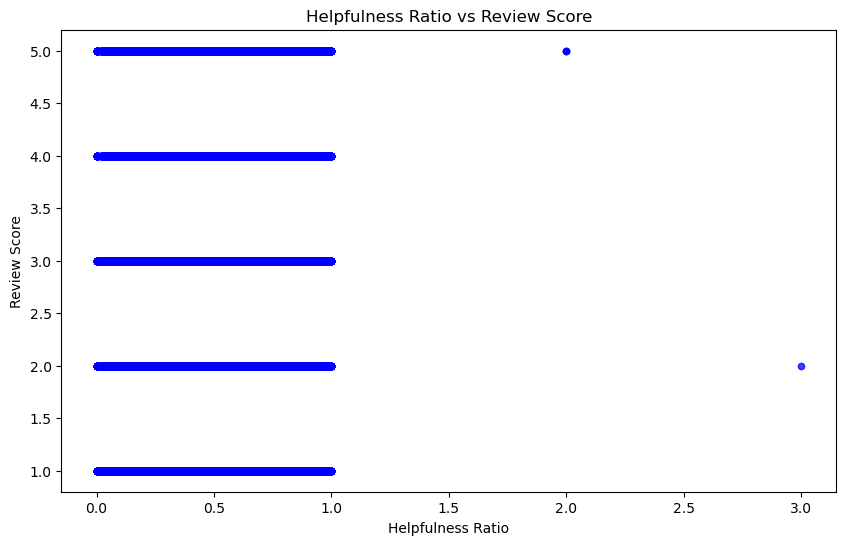

In [69]:
books_rating.plot.scatter(
    x="helpful_ratio", y="review/score", alpha=0.5, figsize=(10, 6), color="blue"
)
plt.title("Helpfulness Ratio vs Review Score")
plt.xlabel("Helpfulness Ratio")
plt.ylabel("Review Score")
plt.show()

# 3. Joining the books_data and books_rating Datasets

- ## To further analyse and implement recommendation techniques:

In [72]:
df_join = pd.merge(books_rating, books_data, on = 'Title', how = 'inner')

In [73]:
df_join

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text,...,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount,publishedYear
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,1999-10-23,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...,...,NaN,Julie Strain,http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN,1996
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,2004-09-21,Really Enjoyed It,I don't care much for Dr. Seuss but after read...,...,Philip Nel takes a fascinating look into the k...,Philip Nel,http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,2005
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,2004-03-09,Essential for every personal and Public Library,"If people become the books they read and if ""t...",...,Philip Nel takes a fascinating look into the k...,Philip Nel,http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,2005
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,2004-07-25,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",...,Philip Nel takes a fascinating look into the k...,Philip Nel,http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,2005
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,2005-02-10,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...,...,Philip Nel takes a fascinating look into the k...,Philip Nel,http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,B000NSLVCU,The Idea of History,NaN,NaN,NaN,14/19,4.0,1999-09-18,Difficult,"This is an extremely difficult book to digest,...",...,"Robin George Collingwood, FBA (1889 - 1943) wa...",R. G. Collingwood,http://books.google.com/books/content?id=1aLtu...,http://books.google.nl/books?id=1aLtuAEACAAJ&d...,White Press,2018-06-21,http://books.google.nl/books?id=1aLtuAEACAAJ&d...,['History'],3.0,2018
2999996,B000NSLVCU,The Idea of History,NaN,A1SMUB9ASL5L9Y,jafrank,1/1,4.0,2012-03-14,Quite good and ahead of its time occasionally,This is pretty interesting. Collingwood seems ...,...,"Robin George Collingwood, FBA (1889 - 1943) wa...",R. G. Collingwood,http://books.google.com/books/content?id=1aLtu...,http://books.google.nl/books?id=1aLtuAEACAAJ&d...,White Press,2018-06-21,http://books.google.nl/books?id=1aLtuAEACAAJ&d...,['History'],3.0,2018
2999997,B000NSLVCU,The Idea of History,NaN,A2AQMEKZKK5EE4,"L. L. Poulos ""Muslim Mom""",0/0,4.0,2007-05-27,Easier reads of those not well versed in histo...,"This is a good book but very esoteric. ""What i...",...,"Robin George Collingwood, FBA (1889 - 1943) wa...",R. G. Collingwood,http://books.google.com/books/content?id=1aLtu...,http://books.google.nl/books?id=1aLtuAEACAAJ&d...,White Press,2018-06-21,http://books.google.nl/books?id=1aLtuAEACAAJ&d...,['History'],3.0,2018
2999998,B000NSLVCU,The Idea of History,NaN,A18SQGYBKS852K,"Julia A. Klein ""knitting rat""",1/11,5

# Popularity Based Recommender System

In [75]:
# Calculating number of ratings each book has received
num_ratings = df_join.groupby("Title")["review/score"].count().reset_index()
num_ratings.rename(columns={"review/score": "num_ratings"}, inplace=True)
df_join = pd.merge(df_join, num_ratings, on="Title", how="inner")

df_join.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text,...,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount,publishedYear,num_ratings
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,1999-10-23,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...,...,Julie Strain,http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN,1996,1
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,2004-09-21,Really Enjoyed It,I don't care much for Dr. Seuss but after read...,...,Philip Nel,http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,2005,9
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,2004-03-09,Essential for every personal and Public Library,"If people become the books they read and if ""t...",...,Philip Nel,http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,2005,9
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,2004-07-25,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",...,Philip Nel,http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,2005,9
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,2005-02-10,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...,...,Philip Nel,http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,2005,9


In [76]:
num_ratings.describe()

,num_ratings
count,212403.000000
mean,14.123115
std,116.156424
min,1.000000
25%,1.000000
50%,3.000000
75%,8.000000
max,22023.000000


In [77]:
# Calculating average rating of each book
avg_ratings = df_join.groupby("Title")["review/score"].mean().reset_index()
avg_ratings.rename(columns={"review/score": "avg_rating_value"}, inplace=True)
avg_ratings

avg_ratings = df_join.groupby("Title")["review/score"].mean().reset_index()
avg_ratings.rename(columns={"review/score": "avg_ratings"}, inplace=True)
df_join = pd.merge(df_join, avg_ratings, on="Title", how="inner")

df_join.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text,...,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount,publishedYear,num_ratings,avg_ratings
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,1999-10-23,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...,...,http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN,1996,1,4.000000
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,2004-09-21,Really Enjoyed It,I don't care much for Dr. Seuss but after read...,...,http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,2005,9,4.555556
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,2004-03-09,Essential for every personal and Public Library,"If people become the books they read and if ""t...",...,http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,2005,9,4.555556
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,2004-07-25,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",...,http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,2005,9,4.555556
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,2005-02-10,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...,...,http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,2005,9,4.555556


In [78]:
avg_ratings.describe()

,avg_ratings
count,212403.000000
mean,4.273103
std,0.823276
min,1.000000
25%,4.000000
50%,4.500000
75%,5.000000
max,5.000000


In [79]:
# Creating a new df to store only books which have number of ratings greater than 250
df_join_cleaned = df_join[df_join['num_ratings']>=250].sort_values('avg_ratings',ascending=False)

#### Remove those records having invalid review/helpfulness

In [81]:
# Split the 'review/helpfulness' column into numerator and denominator
df_join_cleaned[["numerator", "denominator"]] = df_join_cleaned[
    "review/helpfulness"
].str.split("/", expand=True)

# Convert the columns to numeric for comparison
df_join_cleaned["numerator"] = pd.to_numeric(
    df_join_cleaned["numerator"], errors="coerce"
)
df_join_cleaned["denominator"] = pd.to_numeric(
    df_join_cleaned["denominator"], errors="coerce"
)

# Filter out rows where the numerator is greater than the denominator
df_join_cleaned = df_join_cleaned[
    df_join_cleaned["numerator"] <= df_join_cleaned["denominator"]
]

# Drop the extra columns if necessary
df_join_cleaned = df_join_cleaned.drop(columns=["numerator", "denominator"])


In [82]:
df_join_cleaned
popular_df = df_join_cleaned

In [83]:
# Popular books function
def popular_books(top_n=5):
    """
    Recommend popular books.

    Args:
        top_n (int): Number of recommendations to return.

    Returns:
        List of recommended books.
    """
    # List of columns to keep
    columns_to_keep = [
        "Title",
        "authors",
        "publisher",
        "previewLink",
        "num_ratings",
        "avg_ratings",
    ]

    # Create the new DataFrame with only the specified columns
    popular_df = (
        df_join_cleaned[columns_to_keep]
        .sort_values("avg_ratings", ascending=False)
        .drop_duplicates(subset="Title")
        .head(top_n)
    )

    return popular_df["Title"]

In [84]:
# List of columns to keep
columns_to_keep = [
    "Title",
    "authors",
    "publisher",
    "previewLink",
    "num_ratings",
    "avg_ratings",
]

# Printing the required columns for the top 50 popular books
popular_df = (
    df_join_cleaned[columns_to_keep]
    .sort_values("avg_ratings", ascending=False)
    .drop_duplicates(subset="Title")
    .head(50)
)

popular_df


,Title,authors,publisher,previewLink,num_ratings,avg_ratings
907160,With the Old Breed: At Peleliu and Okinawa,E.B. Sledge,Presidio Press,http://books.google.com/books?id=kfgnHCLvQPcC&...,677,4.911374
488526,CARS AND TRUCKS AND THINGS THAT GO,Richard Scarry,Golden Books,http://books.google.com/books?id=tmZeR-bJ53QC&...,286,4.895105
173075,Mossflower,Brian Jacques,Random House,http://books.google.nl/books?id=XobuWfWm6FwC&p...,313,4.872204
1581499,"Mossflower (Redwall, Book 2)",Brian Jacques,Puffin,http://books.google.nl/books?id=QAbTAAAACAAJ&d...,313,4.872204
1955454,Tear Soup: A Recipe for Healing After Loss,Pat Schwiebert,Perinatal Loss,http://books.google.com/books?id=OXwKAQAAMAAJ&...,334,4.868263
894344,Where the Sidewalk Ends: Poems and Drawings,Shel Silverstein,HarperFestival,http://books.google.com/books?id=9RUNAQAAMAAJ&...,400,4.867500
902717,Harrington on Hold 'em Expert Strategy for No ...,Dan Harrington,Two Plus Two Publishing LLC,http://books.google.com/books?id=yQAza2ncVhEC&...,286,4.867133
222058,The Synonym Finder,J. I. Rodale,Rodale Books,http://books.google.nl/books?id=O1v2CwAAQBAJ&p...,307,4.863192
669200,The monster at the end of this book (A little ...,Jon Stone,Golden Books,http://books.google.com/books?id=BSEXEAAAQBAJ&...,390,4.846154
1739798,The Monster At The End Of This Book,Jon Stone,Golden Books,http://books.google.com/books?id=d2sBDAAAQBAJ&...,386,4.844560


#### Category Binning into Broader Categories

In [86]:
df_join_cleaned["categories"] = (
    df_join_cleaned["categories"].str.replace(r"[\[\]']", "", regex=True).str.strip()
)
df_join_cleaned

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text,...,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount,publishedYear,num_ratings,avg_ratings
907160,B000FSNWDO,With the Old Breed: At Peleliu and Okinawa,NaN,A37J8E34DFUM85,J. Turk,1/2,5.0,2010-04-26,YOU ARE THERE,"Totally captivating, honestly written account ...",...,http://books.google.com/books/content?id=kfgnH...,http://books.google.com/books?id=kfgnHCLvQPcC&...,Presidio Press,2008-12-18,https://play.google.com/store/books/details?id...,History,8.0,2008,677,4.911374
907488,B000FSNWDO,With the Old Breed: At Peleliu and Okinawa,NaN,A8DJ9EU2QP2JM,Wayne A. Smith,0/0,5.0,2012-11-05,War Stripped of Its Glory,E.B. Sledge has written a fantastic first pers...,...,http://books.google.com/books/content?id=kfgnH...,http://books.google.com/books?id=kfgnHCLvQPcC&...,Presidio Press,2008-12-18,https://play.google.com/store/books/details?id...,History,8.0,2008,677,4.911374
907159,B000FSNWDO,With the Old Breed: At Peleliu and Okinawa,NaN,A34FW7AV2ZY29F,Blake,1/2,5.0,2010-05-03,Great book written by a great man!!,I have read many books about WWII. With The Ol...,...,http://books.google.com/books/content?id=kfgnH...,http://books.google.com/books?id=kfgnHCLvQPcC&...,Presidio Press,2008-12-18,https://play.google.com/store/books/details?id...,History,8.0,2008,677,4.911374
907161,B000FSNWDO,With the Old Breed: At Peleliu and Okinawa,NaN,AFCB1SFZKVB6G,"bookman ""book man""",1/2,5.0,2010-04-26,with the old breed,This book was as real as it gets. This author ...,...,http://books.google.com/books/content?id=kfgnH...,http://books.google.com/books?id=kfgnHCLvQPcC&...,Presidio Press,2008-12-18,https://play.google.com/store/books/details?id...,History,8.0,2008,677,4.911374
907162,B000FSNWDO,With the Old Breed: At Peleliu and Okinawa,NaN,A3OD5XSWKWOPP7,"shafter_bare ""Shafter""",1/2,5.0,2010-04-21,My thoughts,This is a very good book for anyone interested...,...,http://books.google.com/books/content?id=kfgnH...,http://books.google.com/books?id=kfgnHCLvQPcC&...,Presidio Press,2008-12-18,https://play.google.com/store/books/details?id...,History,8.0,2008,677,4.911374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449633,B000FFJRI6,"Crossroads of Twilight (The Wheel of Time, Boo...",NaN,A2YFLVPIPM8NRH,"John Montsko ""John""",9/9,1.0,2009-11-25,Skip this one.,I am a huge fan of the series but this was pai...,...,http://books.google.com/books/content?id=ER6Bq...,http://books.google.com/books?id=ER6BqLHOmO4C&...,Tor Fantasy,2010-07-20,https://play.google.com/store/books/details?id...,Fiction,65.0,2010,2526,1.802454
449632,B000FFJRI6,"Crossroads of Twilight (The Wheel of Time, Boo...",NaN,A2HOFEYD0UYPI0,M. David Johnson,22/26,1.0,2005-04-17,No ending.,I recently discovered the Wheel of Time series...,...,http://books.google.com/books/content?id=ER6Bq...,http://books.google.com/books?id=ER6BqLHOmO4C&...,Tor Fantasy,2010-07-20,https://play.google.com/store/books/details?id...,Fiction,65.0,2010,2526,1.802454
449631,B000FFJRI6,"Crossroads of Twilight (The Wheel of Time, Boo...",NaN,A34RS888ZDP6EL,Scott Hotchkin,19/22,1.0,2003-01-09,jordan wtf,This was by far the worst book in the series t...,...,http://books.google.com/books/content?id=ER6Bq...,http://books.google.com/books?id=ER6BqLHOmO4C&...,Tor Fantasy,2010-07-20,https://play.google.com/store/books/details?id...,Fiction,65.0,2010,2526,1.802454
449630,B000FFJRI6,"Crossroads of Twilight (The Wheel of Time, Boo...",NaN,A3219BRXQS5GXL,"""c_townsend""",19/22,1.0,2003-02-16,4 chapters stretched out to 600+ pages,"WoT, at this point reminds me of a puzzle from...",...,http://books.google.com/books/content?id=ER6Bq...,http://books.google.com/books?id=ER6BqLHOmO4C&...,Tor Fantasy,2010-07-20,https://play.google.com/store/books/details?id...,Fiction,65.0,2010,2526,1.802454


In [87]:
df_join_cleaned["categories"].value_counts().head(50)

categories
Fiction                                  432375
Juvenile Fiction                         116622
Biography & Autobiography                 31739
History                                   21028
Religion                                  19943
Young Adult Fiction                       17146
Business & Economics                      14156
Self-Help                                  8439
Literary Criticism                         7707
Political Science                          7391
Science                                    6337
Adventure stories                          6165
Juvenile Nonfiction                        6086
Drama                                      5878
Philosophy                                 5060
True Crime                                 4967
Book burning                               4932
Social Science                             4483
Humor                                      4481
Family & Relationships                     4465
FICTION                      

In [88]:
unique_categories = df_join_cleaned['categories'].unique()

In [89]:
unique_categories

array(['History', 'Juvenile Nonfiction', 'Juvenile Fiction',
       'Games & Activities', 'Reference', 'Biography & Autobiography',
       nan, 'AReproductive health', 'Humor', 'Religion',
       'Comics & Graphic Novels', 'Literary Criticism', 'Cooking',
       'Family & Relationships', 'Fiction', 'Health & Fitness',
       'Reading (Elementary)', 'Devotional calendars',
       'Audio-visual education', 'Existential psychotherapy',
       'Self-publishing', 'Self-Help', 'Poetry', 'Social Science',
       'Sports & Recreation', 'Christmas stories', '"Childrens stories"',
       'Young Adult Fiction', 'Banks and banking', 'Adventure stories',
       'Education', 'True Crime', 'Business ethics', 'American fiction',
       'Brothers', 'New Thought', 'Music', 'Photography', 'Computers',
       'Bullying', 'Carbohydrates, Refined', 'Readers', 'Fantasy fiction',
       'Baggins, Bilbo (Fictitious character)',
       'Baggins, Frodo (Fictitious character)', 'Audiobooks',
       'Jewish fictio

In [90]:
df_join_cleaned['categories'] = df_join_cleaned['categories'].fillna("Unknown").astype(str)

In [91]:
broad_categories = [
    "Fiction",
    "nonfiction",
    "Biography & Autobiography",
    "Religion",
    "History",
    "Business & Economics",
    "Computers",
    "Science",
    "Others"
]

In [92]:
pip install rapidfuzz

Note: you may need to restart the kernel to use updated packages.


In [93]:
from rapidfuzz import process


# Define mapping function
def map_to_broad_category(category):
    category = category.lower()  # Convert everything to lowercase
    if (
        category.lower() == "unknown"
        or category.lower() == "juvenile nonfiction"
        or category.lower() == "young adult nonfiction"
    ):
        return "Others"

    match = process.extractOne(category, broad_categories, score_cutoff=80)
    return match[0] if match else "Others"


# Apply preprocessing and map back to the DataFrame
df_join_cleaned["categories"] = (
    df_join_cleaned["categories"].fillna("Unknown").str.lower()
)

In [94]:
unique_categories = df_join_cleaned['categories'].unique()

In [95]:
# Map only on unique categories
mapped_categories = {cat: map_to_broad_category(cat) for cat in unique_categories}

# Apply mapping back to the original DataFrame
df_join_cleaned["broad_categories"] = df_join_cleaned["categories"].map(
    mapped_categories
)

In [96]:
df_join_cleaned

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text,...,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount,publishedYear,num_ratings,avg_ratings,broad_categories
907160,B000FSNWDO,With the Old Breed: At Peleliu and Okinawa,NaN,A37J8E34DFUM85,J. Turk,1/2,5.0,2010-04-26,YOU ARE THERE,"Totally captivating, honestly written account ...",...,http://books.google.com/books?id=kfgnHCLvQPcC&...,Presidio Press,2008-12-18,https://play.google.com/store/books/details?id...,history,8.0,2008,677,4.911374,History
907488,B000FSNWDO,With the Old Breed: At Peleliu and Okinawa,NaN,A8DJ9EU2QP2JM,Wayne A. Smith,0/0,5.0,2012-11-05,War Stripped of Its Glory,E.B. Sledge has written a fantastic first pers...,...,http://books.google.com/books?id=kfgnHCLvQPcC&...,Presidio Press,2008-12-18,https://play.google.com/store/books/details?id...,history,8.0,2008,677,4.911374,History
907159,B000FSNWDO,With the Old Breed: At Peleliu and Okinawa,NaN,A34FW7AV2ZY29F,Blake,1/2,5.0,2010-05-03,Great book written by a great man!!,I have read many books about WWII. With The Ol...,...,http://books.google.com/books?id=kfgnHCLvQPcC&...,Presidio Press,2008-12-18,https://play.google.com/store/books/details?id...,history,8.0,2008,677,4.911374,History
907161,B000FSNWDO,With the Old Breed: At Peleliu and Okinawa,NaN,AFCB1SFZKVB6G,"bookman ""book man""",1/2,5.0,2010-04-26,with the old breed,This book was as real as it gets. This author ...,...,http://books.google.com/books?id=kfgnHCLvQPcC&...,Presidio Press,2008-12-18,https://play.google.com/store/books/details?id...,history,8.0,2008,677,4.911374,History
907162,B000FSNWDO,With the Old Breed: At Peleliu and Okinawa,NaN,A3OD5XSWKWOPP7,"shafter_bare ""Shafter""",1/2,5.0,2010-04-21,My thoughts,This is a very good book for anyone interested...,...,http://books.google.com/books?id=kfgnHCLvQPcC&...,Presidio Press,2008-12-18,https://play.google.com/store/books/details?id...,history,8.0,2008,677,4.911374,History
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449633,B000FFJRI6,"Crossroads of Twilight (The Wheel of Time, Boo...",NaN,A2YFLVPIPM8NRH,"John Montsko ""John""",9/9,1.0,2009-11-25,Skip this one.,I am a huge fan of the series but this was pai...,...,http://books.google.com/books?id=ER6BqLHOmO4C&...,Tor Fantasy,2010-07-20,https://play.google.com/store/books/details?id...,fiction,65.0,2010,2526,1.802454,Fiction
449632,B000FFJRI6,"Crossroads of Twilight (The Wheel of Time, Boo...",NaN,A2HOFEYD0UYPI0,M. David Johnson,22/26,1.0,2005-04-17,No ending.,I recently discovered the Wheel of Time series...,...,http://books.google.com/books?id=ER6BqLHOmO4C&...,Tor Fantasy,2010-07-20,https://play.google.com/store/books/details?id...,fiction,65.0,2010,2526,1.802454,Fiction
449631,B000FFJRI6,"Crossroads of Twilight (The Wheel of Time, Boo...",NaN,A34RS888ZDP6EL,Scott Hotchkin,19/22,1.0,2003-01-09,jordan wtf,This was by far the worst book in the series t...,...,http://books.google.com/books?id=ER6BqLHOmO4C&...,Tor Fantasy,2010-07-20,https://play.google.com/store/books/details?id...,fiction,65.0,2010,2526,1.802454,Fiction
449630,B000FFJRI6,"Crossroads of Twilight (The Wheel of Time, Boo...",NaN,A3219BRXQS5GXL,"""c_townsend""",19/22,1.0,2003-02-16,4 chapters stretched out to 600+ pages,"WoT, at this point reminds me of a puzzle from...",...,http://books.google.com/books?id=ER6BqLHOmO4C&...,Tor Fantasy,2010-07-20,https://play.google.com/store/books/details?id...,fiction,65.0,2010,2526,1.802454,Fiction


# DBSCAN Clustering on Title based on authors, publisher, broad_categories and avg_ratings

In [98]:
# Defining new df to store necessary columns
cluster_df=df_join_cleaned[['Title','authors', 'publisher', 'broad_categories', 'avg_ratings']]

In [99]:
cluster_df=cluster_df.drop_duplicates()

In [100]:
# Encoding categorical columns
le_authors = LabelEncoder()
le_publisher = LabelEncoder()
le_categories = LabelEncoder()

cluster_df["authors_encoded"] = le_authors.fit_transform(cluster_df["authors"])
cluster_df["publisher_encoded"] = le_publisher.fit_transform(cluster_df["publisher"])
cluster_df["categories_encoded"] = le_categories.fit_transform(
    cluster_df["broad_categories"]
)

# Feature selection
features = cluster_df[
    ["authors_encoded", "publisher_encoded", "avg_ratings", "categories_encoded"]
]

# Normalizing features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Applying DBSCAN
dbscan = DBSCAN(
    eps=0.5, min_samples=5, metric="euclidean"
) 
clusters = dbscan.fit_predict(features_scaled)

# Adding cluster labels to the dataframe
cluster_df["cluster"] = clusters

# Visualize results
print(
    cluster_df[
        ["Title", "authors", "publisher", "avg_ratings", "broad_categories", "cluster"]
    ]
)

                                                     Title  \
907160          With the Old Breed: At Peleliu and Okinawa   
488699                  CARS AND TRUCKS AND THINGS THAT GO   
1581394                       Mossflower (Redwall, Book 2)   
173354                                          Mossflower   
1955393         Tear Soup: A Recipe for Healing After Loss   
...                                                    ...   
905438                                           4 Blondes   
1852844                                      Hornet's Nest   
1353006                                  Roman Catholicism   
2743146                 Predator (Kay Scarpetta Mysteries)   
448708   Crossroads of Twilight (The Wheel of Time, Boo...   

                           authors             publisher  avg_ratings  \
907160                 E.B. Sledge        Presidio Press     4.911374   
488699              Richard Scarry          Golden Books     4.895105   
1581394              Brian Jacques  

In [101]:
cluster_df.to_csv('Clustering_On_Title.csv')

# Recommendation Model

## Functions to perform collaborative Filtering, Content-Based Filtering and combining them to create a Hybrid model

In the below model we have applied SVD after that Content based and Collaborative filtering are done. An hybrid model based on results of the results of both model is created.

In [104]:
# Collaborative Filtering Setup
collab_fil_df = df_join_cleaned[['User_id', 'Title', 'review/score']].drop_duplicates()
collab_fil_df = pd.merge(collab_fil_df, cluster_df, on='Title', how='inner')[['User_id', 'Title', 'review/score', 'cluster']].drop_duplicates()

# Normalize numeric features
scaler = MinMaxScaler()
collab_fil_df['scaled_ratings'] = scaler.fit_transform(collab_fil_df[['review/score']])

# Pivot the data to create a user-book matrix
user_book_matrix = collab_fil_df.pivot_table(index='User_id', columns='Title', values='scaled_ratings')
user_book_matrix.fillna(0, inplace=True)

# Convert to a NumPy array
matrix = user_book_matrix.values
# Apply Truncated SVD
svd = TruncatedSVD(n_components=100, random_state=42)
user_factors = svd.fit_transform(matrix)
book_factors = svd.components_
# Compute book similarity using the latent factors
book_similarity = cosine_similarity(book_factors.T)

# Map books to their indices
book_indices = user_book_matrix.columns

# Collaborative Filtering Recommendation
def recommend_books_with_clusters(input_user=None, input_books=None, top_n=5):
    """
    Recommend books for a user based on clusters and collaborative filtering.

    Args:
        input_user (str): User ID (optional).
        input_books (list): List of books the user has read (optional).
        top_n (int): Number of recommendations to return.

    Returns:
        List of recommended books with scores.
    """
    if input_user:
        if input_user not in user_book_matrix.index:
            raise ValueError("User not found in the dataset.")

        # Get the list of books the user has rated
        user_ratings = user_book_matrix.loc[input_user]
        input_books = user_ratings[user_ratings > 0].index.tolist()

    if not input_books:
        raise ValueError("No input books provided for recommendation.")

    # Retrieve clusters of the input books
    clusters = collab_fil_df.loc[collab_fil_df['Title'].isin(input_books), 'cluster'].unique()

    # Get books in the same clusters
    candidate_books = collab_fil_df[collab_fil_df['cluster'].isin(clusters)]['Title'].unique()
    candidate_book_indices = [book_indices.get_loc(book) for book in candidate_books if book in book_indices]

    # Find indices of the books the user has read
    input_book_indices = [book_indices.get_loc(book) for book in input_books if book in book_indices]

    # Compute similarity scores for candidate books
    scores = np.zeros(len(book_indices))
    for idx in input_book_indices:
        scores += book_similarity[idx]

    # Filter scores to only include candidate books
    for i in range(len(scores)):
        if i not in candidate_book_indices:
            scores[i] = -np.inf  # Exclude books outside the candidate pool

    # Exclude books the user has already read
    for idx in input_book_indices:
        scores[idx] = -np.inf  # Assign a very low score to exclude these books

    # Get top N recommendations
    recommended_indices = np.argsort(scores)[::-1][:top_n]
    recommendations = [(book_indices[i], scores[i]) for i in recommended_indices if scores[i] != -np.inf]

    return recommendations

# Content-Based Filtering 
def content_based_filtering_with_scores(book_title, df_join_cleaned, cluster_df, n_recommendations=5):
    """
    Recommend books based on content similarity and return scores.

    Args:
        book_title (str): Title of the input book.
        df_join_cleaned (DataFrame): DataFrame containing book details, including broad_categories, authors, and avg_ratings.
        cluster_df (DataFrame): DataFrame containing cluster information.
        n_recommendations (int): Number of recommendations to return.

    Returns:
        List of tuples containing recommended book titles and their scores.
    """
    # Create a new DataFrame for content-based filtering
    content_df = df_join_cleaned[['Title', 'avg_ratings', 'broad_categories', 'authors']].drop_duplicates()
    content_df_1 = cluster_df[['Title', 'cluster']].drop_duplicates()
    content_df = pd.merge(
        content_df,
        content_df_1,
        on='Title',
        how='inner'
    )

    # Normalize numeric features
    scaler = MinMaxScaler()
    content_df['scaled_avg_ratings'] = scaler.fit_transform(content_df[['avg_ratings']])

    # Combine relevant features into a single string for vectorization
    content_df['combined_features'] = (
        content_df['scaled_avg_ratings'].astype(str) + " " +
        content_df['cluster'].astype(str) + " " +
        content_df['broad_categories'].fillna('').astype(str) + " " +
        content_df['authors'].fillna('').astype(str)
    )

    # TF-IDF Vectorization
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform(content_df['combined_features'])

    # Apply SVD to reduce dimensionality
    svd = TruncatedSVD(n_components=100, random_state=42)
    reduced_matrix = svd.fit_transform(tfidf_matrix)

    # Compute cosine similarity
    cosine_sim = cosine_similarity(reduced_matrix, reduced_matrix)

    # Find index of the input book
    try:
        idx = content_df[content_df['Title'] == book_title].index[0]
    except IndexError:
        raise ValueError(f"The book '{book_title}' is not found in the dataset.")

    similarity_scores = list(enumerate(cosine_sim[idx]))

    # Sort by similarity score
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

    # Exclude the input book itself
    similarity_scores = [(i, score) for i, score in similarity_scores if content_df.iloc[i]['Title'] != book_title]

    # Get top N recommendations
    recommendations = []
    for i, score in similarity_scores[:n_recommendations]:
        recommendations.append((content_df.iloc[i]['Title'], score))

    return recommendations

# Hybrid Model
def weighted_hybrid_recommendation(user_id=None, book_title=None, user_item_matrix=None, df_join_cleaned=None, cluster_df=None, collab_fil_df=None, top_n=5, collab_weight=0.7, content_weight=0.3):
    """
    Weighted hybrid recommendation combining collaborative filtering and content-based filtering.

    Args:
        user_id (str): User ID for collaborative filtering.
        book_title (str): Title of the book for content-based filtering.
        user_item_matrix (DataFrame): User-item matrix for collaborative filtering.
        df_join_cleaned (DataFrame): DataFrame containing book details.
        cluster_df (DataFrame): DataFrame containing cluster information.
        collab_fil_df (DataFrame): DataFrame with collaborative filtering data and clusters.
        top_n (int): Number of recommendations to return.
        collab_weight (float): Weight for collaborative filtering recommendations.
        content_weight (float): Weight for content-based recommendations.

    Returns:
        List of recommended books.
    """
    # Collaborative Filtering Recommendations
    if user_id:
        collab_recommendations = recommend_books_with_clusters(input_user=user_id, top_n=top_n)
    else:
        collab_recommendations = recommend_books_with_clusters(input_books=[book_title], top_n=top_n)
    
    collab_scores = {book[0]: collab_weight * book[1] for book in collab_recommendations}

    # Content-Based Recommendations
    content_recommendations_with_scores = content_based_filtering_with_scores(book_title, df_join_cleaned, cluster_df, n_recommendations=top_n)
    content_scores = {book: content_weight * score for book, score in content_recommendations_with_scores}

    # Combine and weight the recommendations
    combined_scores = collab_scores
    for book, score in content_scores.items():
        if book in combined_scores:
            combined_scores[book] += score  # Add content-based score if the book is already in recommendations
        else:
            combined_scores[book] = score  # Add new book with its content-based score

    # Sort recommendations by the combined scores
    sorted_recommendations = sorted(combined_scores.items(), key=lambda x: x[1], reverse=True)

    # Return top N recommendations
    final_recommendations = [book for book, score in sorted_recommendations[:top_n]]
    return final_recommendations


# Call hybrid model
recommendations = weighted_hybrid_recommendation(
    user_id='A34FW7AV2ZY29F',
    book_title='With the Old Breed: At Peleliu and Okinawa',
    user_item_matrix=user_book_matrix,
    df_join_cleaned=df_join_cleaned,
    cluster_df=cluster_df,
    collab_fil_df=collab_fil_df,
    top_n=5
)
print("Hybrid Recommendations:", recommendations)


Hybrid Recommendations: ['The forgotten soldier', 'Understanding Exposure', 'Neither Here Nor There', 'The Five Love Languages: The Secret to Love that Lasts', 'The Lost Continent']


# Application to display results

In [106]:
# Function to handle recommendations
def get_recommendations():
    selected_system = system_choice.get()
    results = []

    if selected_system == "Popular Books":
        top_n = int(top_n_entry.get())
        results = popular_books(top_n=top_n)

    elif selected_system == "Collaborative Filtering":
        user = user_entry.get()
        books = books_entry.get().split(",")  # Split the comma-separated input into a list
        books = [book.strip() for book in books if book.strip()]  # Remove any extra spaces
        try:
            top_n = int(top_n_entry.get())
        except ValueError:
            messagebox.showerror("Invalid Input", "Top N must be an integer.")
            return
        results = [book for book, score in recommend_books_with_clusters(input_user=user, input_books=books, top_n=top_n)]

    elif selected_system == "Content-Based Filtering":
        book_title = book_title_entry.get()
        try:
            top_n = int(top_n_entry.get())
        except ValueError:
            messagebox.showerror("Invalid Input", "Top N must be an integer.")
            return
        results = [book for book, score in content_based_filtering_with_scores(book_title=book_title, df_join_cleaned=df_join_cleaned, cluster_df=cluster_df, n_recommendations=top_n)]

    elif selected_system == "Hybrid Recommendation":
        user = user_entry.get()
        book_title = book_title_entry.get()
        try:
            top_n = int(top_n_entry.get())
        except ValueError:
            messagebox.showerror("Invalid Input", "Top N must be an integer.")
            return
        results = weighted_hybrid_recommendation(user_id=user, user_item_matrix=user_book_matrix, df_join_cleaned=df_join_cleaned, cluster_df=cluster_df, collab_fil_df=collab_fil_df, book_title=book_title, top_n=top_n)

    # Display results
    result_text.delete(1.0, tk.END)
    for i, rec in enumerate(results, start=1):
        result_text.insert(tk.END, f"{i}. {rec}\n")

# Create the main Tkinter window
root = tk.Tk()
root.title("Book Recommendation System")

# Dropdown menu for selecting the system
ttk.Label(root, text="Select Recommendation System:").grid(row=0, column=0, padx=10, pady=10, sticky="w")
system_choice = ttk.Combobox(root, values=["Popular Books", "Collaborative Filtering", "Content-Based Filtering", "Hybrid Recommendation"], state="readonly")
system_choice.grid(row=0, column=1, padx=10, pady=10)
system_choice.current(0)

# Input fields
ttk.Label(root, text="User ID:").grid(row=1, column=0, padx=10, pady=5, sticky="w")
user_entry = ttk.Entry(root, width=30)
user_entry.grid(row=1, column=1, padx=10, pady=5)

ttk.Label(root, text="Favorite Books (comma-separated):").grid(row=2, column=0, padx=10, pady=5, sticky="w")
books_entry = ttk.Entry(root, width=30)
books_entry.grid(row=2, column=1, padx=10, pady=5)

ttk.Label(root, text="Book Title:").grid(row=3, column=0, padx=10, pady=5, sticky="w")
book_title_entry = ttk.Entry(root, width=30)
book_title_entry.grid(row=3, column=1, padx=10, pady=5)

ttk.Label(root, text="Top N Recommendations:").grid(row=4, column=0, padx=10, pady=5, sticky="w")
top_n_entry = ttk.Entry(root, width=10)
top_n_entry.grid(row=4, column=1, padx=10, pady=5)
top_n_entry.insert(0, "5")  # Default value

# Button to get recommendations
recommend_button = ttk.Button(root, text="Get Recommendations", command=get_recommendations)
recommend_button.grid(row=5, column=0, columnspan=2, pady=10)

# Text box to display results
ttk.Label(root, text="Recommendations:").grid(row=6, column=0, padx=10, pady=5, sticky="w")
result_text = tk.Text(root, height=10, width=50)
result_text.grid(row=7, column=0, columnspan=2, padx=10, pady=5)

# Run the Tkinter main loop
root.mainloop()
